# RFM SEGMENTATION

# Loading Data

In [1]:
# importing required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

In [2]:
#load dataset using pandas
data=pd.read_csv('data.csv',encoding= 'unicode_escape')

# Exploring the Data

In [3]:
#Sneak Peack of the data| Top 5 columns 
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


# About the Data
The data contains 8 columns with customer transactions. The focus columns in this analysis are: Date, Price & Customer ID


In [4]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


# COHORT ANALYSIS
Descriptive analytics tool used to group customers into mutually exclusive cohorts measured over time.
Helps understand high level trends better by providing insight on metrics across products ans Customer life cycle.

# DATA PREPARATION

In [6]:
#Checking for duplicate Values
data[data.duplicated()].any()

InvoiceNo      True
StockCode      True
Description    True
Quantity       True
InvoiceDate    True
UnitPrice      True
CustomerID     True
Country        True
dtype: bool

In [7]:
#Dropping Duplicates
data.drop_duplicates(inplace=True)
#Data Cleaning
data = data[(data['Quantity'] > 0) & (data['UnitPrice'] > 0) & (data['CustomerID'].notnull())]

In [8]:
#Checking if duplicates have been dropped
data[data.duplicated()].any()

InvoiceNo      False
StockCode      False
Description    False
Quantity       False
InvoiceDate    False
UnitPrice      False
CustomerID     False
Country        False
dtype: bool

In [9]:
# Returns the dimensionality of the dataframe: (number of rows, number of columns)
data.shape

(392692, 8)

In [10]:
#Check dtype for InvoiceDate
type(data.InvoiceDate)

pandas.core.series.Series

In [11]:
#Convert InvoiceDate to datetime for manupulation
data["InvoiceDate"] = pd.to_datetime(data["InvoiceDate"])
data["InvoiceDate"]

0        2010-12-01 08:26:00
1        2010-12-01 08:26:00
2        2010-12-01 08:26:00
3        2010-12-01 08:26:00
4        2010-12-01 08:26:00
                 ...        
541904   2011-12-09 12:50:00
541905   2011-12-09 12:50:00
541906   2011-12-09 12:50:00
541907   2011-12-09 12:50:00
541908   2011-12-09 12:50:00
Name: InvoiceDate, Length: 392692, dtype: datetime64[ns]

# Assign Acquisition Month Cohort to each Customer

In [12]:
# Define a function that will parse the date, it truncates given date obect to the first day of the month
def get_month(x): return dt.datetime(x.year, x.month, 1) 

# Create InvoiceMonth column
# Apply to invoiceDate and create InvoiceMonth Column
data['InvoiceMonth'] = data['InvoiceDate'].apply(get_month) 

# Group by CustomerID and select the InvoiceDay value
# Create groupby Obj with CustomerID & use Invoice Month column for further Manipulation
grouping = data.groupby('CustomerID')['InvoiceMonth'] 

# Assign a minimum InvoiceDay value to the dataset
# Finally Transform with min function to assign the smallest InvoiceMonth Value to each Customer
data['CohortMonth'] = grouping.transform('min')


In [13]:
#two columns Invoice Month and Cohort Day Columns have been added
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01


In [14]:
#Extract integer values from the data
def get_date_int(data,column):
    year=data[column].dt.year
    month=data[column].dt.month
    day=data[column].dt.day
    return year, month, day

In [15]:
#Calculate number of months between any transaction and first transaction of each customer


In [16]:
# Assign Time Offset Value
invoice_year, invoice_month, _=get_date_int(data,'InvoiceMonth')
cohort_year, cohort_month,_=get_date_int(data,'CohortMonth')
year_diff= invoice_year-cohort_year
month_diff=invoice_month-cohort_month
#+1 for first month to be marked as one instead of 0 for better interpretetation
data['CohortIndex']= year_diff*12 + month_diff+1
#check if the new column has been added. CohortIndex
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth,CohortIndex
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2010-12-01,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1


In [17]:
# invoice_year, invoice_month, invoice_day = get_date_int(data, 'InvoiceMonth')
# cohort_year, cohort_month, cohort_day = get_date_int(data, 'CohortMonth')

# years_diff = invoice_year - cohort_year
# months_diff = invoice_month - cohort_month

# data['CohortIndex'] = years_diff * 12 + months_diff + 1

# data.head()

In [18]:
grouping = data.groupby(['CohortMonth', 'CohortIndex'])

cohort_data = grouping['CustomerID'].apply(pd.Series.nunique)

cohort_data = cohort_data.reset_index()

cohort_counts = cohort_data.pivot(index='CohortMonth',
                                 columns='CohortIndex',
                                 values='CustomerID')

In [19]:
cohort_sizes = cohort_counts.iloc[:,0]
retention = cohort_counts.divide(cohort_sizes, axis=0)
retention.index=retention.index.date
retention.round(3)*12

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
2010-12-01,12.0,4.392,3.876,4.608,4.356,4.776,4.356,4.188,4.248,4.740,4.488,6.036,3.192
2011-01-01,12.0,2.652,3.192,2.760,3.852,3.456,2.964,2.904,3.600,3.912,4.380,1.416,NaN
2011-02-01,12.0,2.244,2.244,3.408,3.252,2.964,3.036,3.348,2.964,3.660,0.816,NaN,NaN
2011-03-01,12.0,1.800,3.024,2.388,2.676,2.016,3.216,2.760,3.348,1.032,NaN,NaN,NaN
2011-04-01,12.0,2.556,2.436,2.520,2.364,2.724,2.604,3.120,0.876,NaN,NaN,NaN,NaN
2011-05-01,12.0,2.280,2.076,2.076,2.496,2.784,3.168,1.140,NaN,NaN,NaN,NaN,NaN
2011-06-01,12.0,2.088,1.884,3.168,2.772,4.020,1.140,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,12.0,2.172,2.484,2.676,3.252,1.344,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,12.0,2.484,2.988,2.916,1.488,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-09-01,12.0,2.808,3.612,1.368,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Visualization with Heatmaps

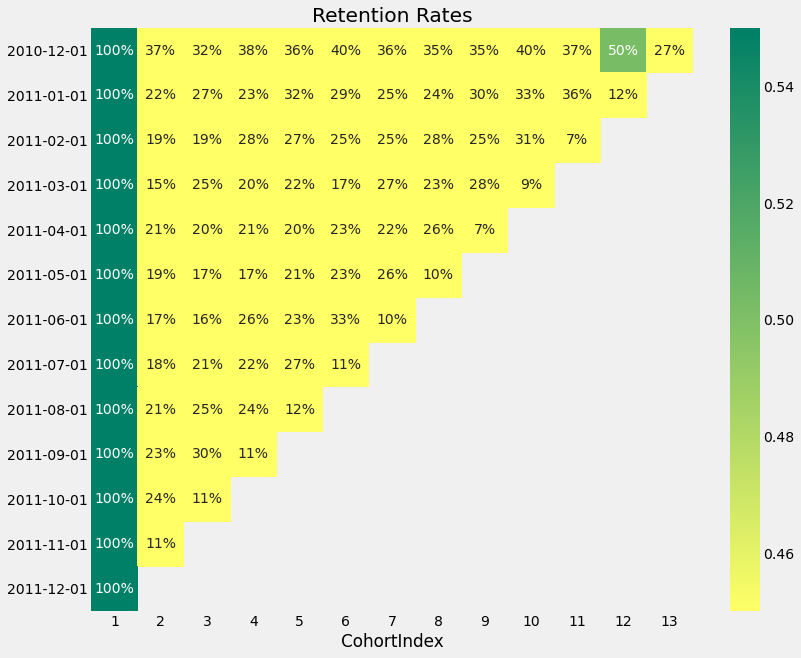

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
#sns.set()
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,10))
plt.title('Retention Rates')

sns.heatmap(data = retention,
           annot = True,
           fmt = '.0%',
           vmin= 0.5,
           vmax=0.5,
           cmap='summer_r')
plt.show()

To implement the RFM analysis, we need to further process the data set in by the following steps:

Find the most recent date for each ID and calculate the days to the now or some other date, to get the Recency data
Calculate the quantity of translations of a customer, to get the Frequency data
Sum the amount of money a customer spent and divide it by Frequency, to get the amount per transaction on average, that is the Monetary data.

# RFM Segmentation
1. Recency (R) : Days Since Last Customer Transaction
2. Frequency (F):  Number of transacations in the last 12 months
3. Monetary Value (M) : Total Spend in the last 12 months

# RFM Data Preperation

 Pandas built-in function #qcut will be used to calculate percentiles

In [22]:
# The data is preprocessed and only contains data spanning for a 12 month period as shown
# In the real would, you work with the most recent data
print('Min:{}; max{}'.format(min(data.InvoiceDate),max(data.InvoiceDate)))

Min:2010-12-01 08:26:00; max2011-12-09 12:50:00


In [25]:
# create hypothetical snapshot_day as if anlysisng the most recent data
snapshot=max(data.InvoiceDate)+dt.timedelta(days=1)

In [30]:
#Create new column TotalSum
data['TotalSum'] = data['Quantity'] * data['UnitPrice']

In [31]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth,CohortIndex,TotalSum
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01,1,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2010-12-01,1,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1,20.34


# Calculating RFM Metrics

In [32]:
datamart=data.groupby(['CustomerID']).agg({
    'InvoiceDate':lambda x:(snapshot-x.max()).days,
    'InvoiceNo':'count',
    'TotalSum':'sum'
    
    
})

In [33]:
# Rename columns for eeasy interpretation
datamart.rename(columns={'InvoiceDate':'Recency',
                         'InvoiceNo': 'Frequency',
                         'TotalSum': 'MonetaryValue'},inplace=True

)

In [34]:
#View of The RFM table
datamart.head()

,Recency,Frequency,MonetaryValue
CustomerID,,,
12346.0,326,1,77183.60
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,19,73,1757.55
12350.0,310,17,334.40


# Building RFM Segments

In [ ]:
# group customers into 5 segments of the same size for each RFM value
#Assign quartile value for each Column and name them RFM


In [35]:
# Recency Quartile:Create generator of values for labels with range function
r_labels=list(range(5,0,-1))

In [37]:
r_quartiles=pd.qcut(datamart['Recency'],5,labels=r_labels)

In [38]:
datamart=datamart.assign(R=r_quartiles.values)

In [44]:
datamart.shape

(4338, 4)

In [45]:
m_labels=range(1,6)
f_labels=range(1,6)
m_quartiles=pd.qcut(datamart['MonetaryValue'],5,labels=m_labels)
f_quartiles=pd.qcut(datamart['Frequency'],5,labels=f_labels)
datamart=datamart.assign(F=f_quartiles.values,M=m_quartiles.values)


In [46]:
datamart.head()

,Recency,Frequency,MonetaryValue,R,F,M
CustomerID,,,,,,
12346.0,326,1,77183.60,1,1,5
12347.0,2,182,4310.00,5,5,5
12348.0,75,31,1797.24,2,3,4
12349.0,19,73,1757.55,4,4,4
12350.0,310,17,334.40,1,2,2


# Building RFM Segment and RFM Score

In [47]:
def join_rfm(x) : return str(x['R'])+str(x['F'])+str(x['M'])
datamart['RFM_Segment']=datamart.apply(join_rfm,axis=1)
datamart['RFM_Score']=datamart[['R','F','M']].sum(axis=1)

In [48]:
datamart.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score
CustomerID,,,,,,,,
12346.0,326,1,77183.60,1,1,5,1.01.05.0,7
12347.0,2,182,4310.00,5,5,5,5.05.05.0,15
12348.0,75,31,1797.24,2,3,4,2.03.04.0,9
12349.0,19,73,1757.55,4,4,4,4.04.04.0,12
12350.0,310,17,334.40,1,2,2,1.02.02.0,5


# Analysing RFM Segments

In [49]:
datamart.groupby('RFM_Segment').size().sort_values(ascending=False)[:10]

RFM_Segment
5.05.05.0    306
1.01.01.0    271
4.05.05.0    170
1.02.02.0    150
4.04.04.0    125
2.01.01.0    123
2.03.03.0    106
2.02.02.0     93
3.03.03.0     93
5.04.04.0     92
dtype: int64

In [50]:
# Summary metrics per RFM Score
datamart.groupby('RFM_Score').agg({
  'Recency':'mean',
  'MonetaryValue' :'mean',
  'Frequency':['mean','count']
    
    
}).round(1)

Recency MonetaryValue Frequency      
             mean          mean      mean count
RFM_Score                                      
3           278.6         138.6       7.0   271
4           203.4         199.6      11.2   260
5           182.6         295.5      16.3   368
6           126.1         370.4      19.8   385
7           102.7         901.2      26.2   383
8            86.5         627.2      35.9   365
9            70.6         863.5      46.4   359
10           59.1        1118.0      61.9   350
11           45.2        1947.7      80.4   336
12           34.3        1786.4     108.2   335
13           23.2        3100.1     140.8   314
14           15.5        4820.6     230.4   306
15            5.3       11665.5     440.7   306

# Grouping Customers into Names Segments

In [51]:
def segment_me(df):
    if df['RFM_Score']>=9 :
        return 'Gold'
    elif(df['RFM_Score']>=5) and df['RFM_Score']<9:
        return 'Silver'
    else:
        return 'Bronze'
    

    
    

In [52]:
datamart['General_Segment']=datamart.apply(segment_me,axis=1)    
datamart.groupby('General_Segment').agg({
  'Recency':'mean',
  'MonetaryValue' :'mean',
  'Frequency':['mean','count']
    
    
}).round(1)

Recency MonetaryValue Frequency      
                   mean          mean      mean count
General_Segment                                      
Bronze            241.8         168.4       9.1   531
Gold               37.5        3457.2     152.3  2306
Silver            124.4         549.9      24.5  1501